<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [55]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

R: Los grupos son muy distintos, como se puede ver en los graficos.

[]

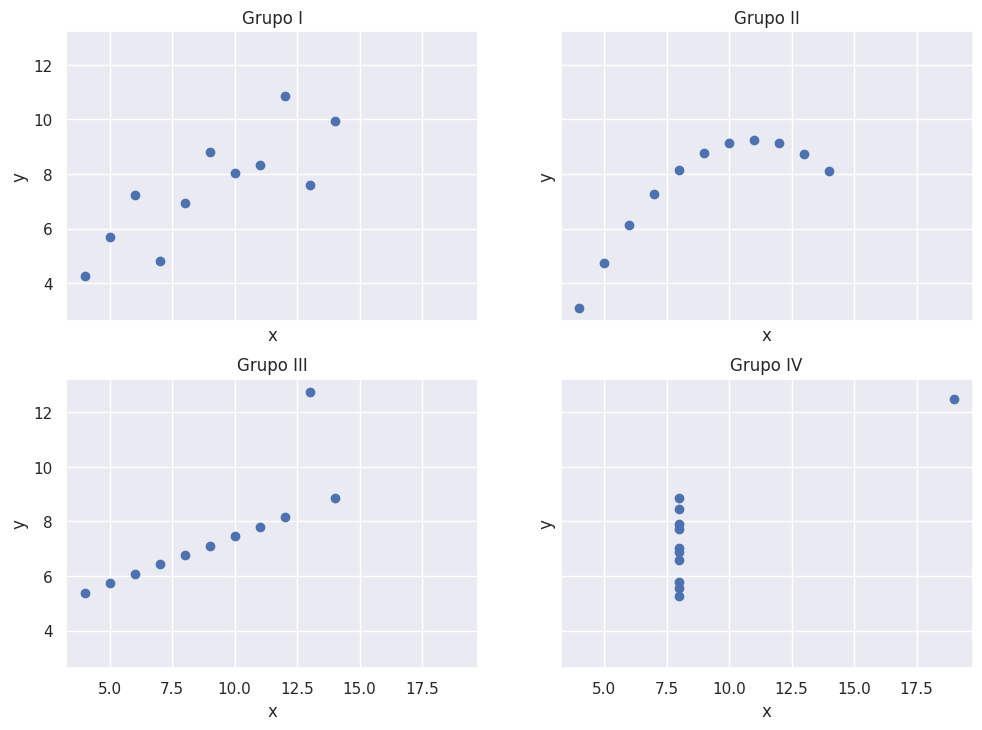

In [56]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
axs[0,0].scatter(data[data['dataset']=='I']['x'],data[data['dataset']=='I']['y'])
axs[0,0].set_title('Grupo I')
axs[0,1].scatter(data[data['dataset']=='II']['x'],data[data['dataset']=='II']['y'])
axs[0,1].set_title('Grupo II')
axs[1,0].scatter(data[data['dataset']=='III']['x'],data[data['dataset']=='III']['y'])
axs[1,0].set_title('Grupo III')
axs[1,1].scatter(data[data['dataset']=='IV']['x'],data[data['dataset']=='IV']['y'])
axs[1,1].set_title('Grupo IV')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
plt.plot()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [57]:
grupos = ['I','II','III','IV']
for grupo in grupos:
  print('Grupo',grupo+':')
  display(data[data['dataset']==grupo].describe())


Grupo I:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


Grupo II:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


Grupo III:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


Grupo IV:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


R: Si bien se veian muy distintos los grupos (en los graficos), resulta que comparten media y desviación estandar.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

R: El siguiente codigo calcula las metricas pedidas para cada grupo y al final presenta los graficos de las regresiones.

Mi interpretación es que estos grupos tambien poseen metricas muy similares (hay diferencias del orden de 0.01) y sus regresiones son practicamente identicas. Sin embargo, las tendencias de los grupos son sumamente distintas.

Grupo I:
mse= 1.2512
r2= 0.6665
___________
Grupo II:
mse= 1.2524
r2= 0.6662
___________
Grupo III:
mse= 1.2506
r2= 0.6663
___________
Grupo IV:
mse= 1.2493
r2= 0.6667
___________


[]

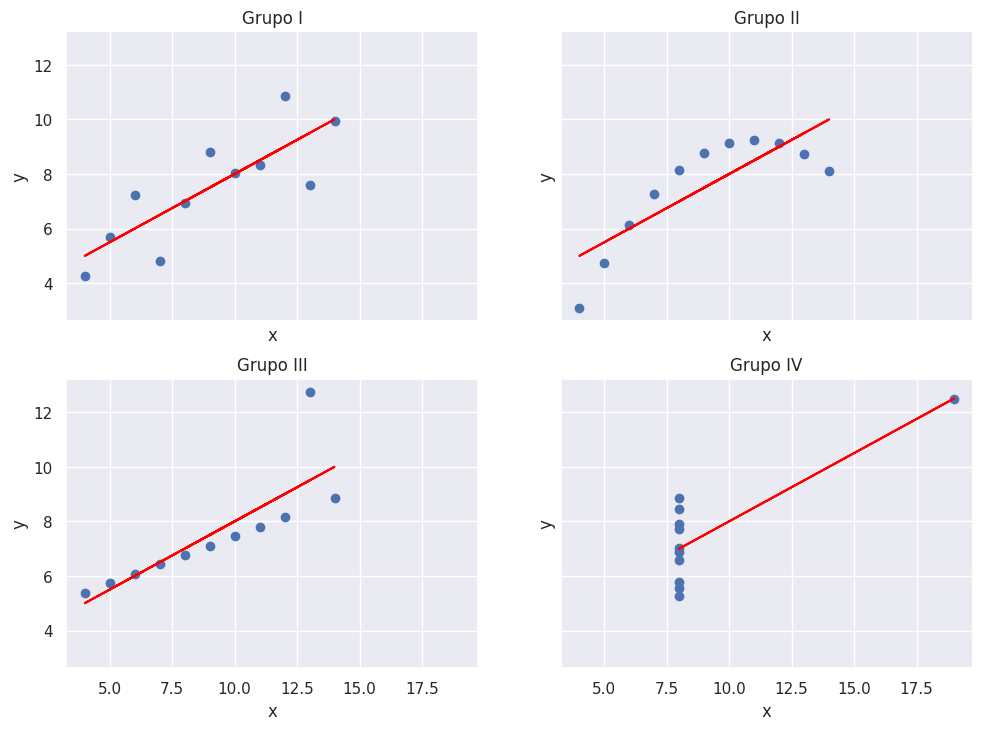

In [58]:
model = LinearRegression()#modelo
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)#para el grafico
index=[(0,0),(0,1),(1,0),(1,1)]#indice para el grafico
contador=0#es para el indice del grafico
for grupo in grupos:

    #obtenemos el x, y e y predecido
    print('Grupo',grupo+':')
    x=data[data['dataset']==grupo]['x'].array.reshape(-1,1)
    ytrue=data[data['dataset']==grupo]['y'].array.reshape(-1,1)
    model.fit(x,ytrue)
    ypred=model.predict(x)

    #parte de grafico
    axs[index[contador]].scatter(x,ytrue,label='data')
    axs[index[contador]].plot(x,ypred,label='regresión lineal',color='red')
    axs[index[contador]].set_title('Grupo '+grupo)

    #calculo de metricas
    mse=round(mean_squared_error(ytrue, ypred), 4)
    r2=round(r2_score(ytrue, ypred), 4)
    print('mse=',mse)
    print('r2=',r2)
    print('___________')

    contador+=1
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
plt.plot()

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Grupo I: Notamos que estos datos no tienen una tendencia clara y por ende, no hay una estrategia a seguir. Por esta razon, se dejara igual.

Grupo II: Notamos una tendencia cuadratica. Por ende, cambiamos a un modelo cuadratico

Grupo III: Notamos que la tendencia es lineal, pero hay un outlier. Quitaremos el outlayer y volveremos a usar la regresión lineal.

Grupo IV: Notamos que hay un outlayer, al quitarlo tenemos una tendencia lineal del tipo $$x=8$$ La cual no es soportada por la regresión lineal. Para arreglar esto podemos cambiar los roles de las variables.

[]

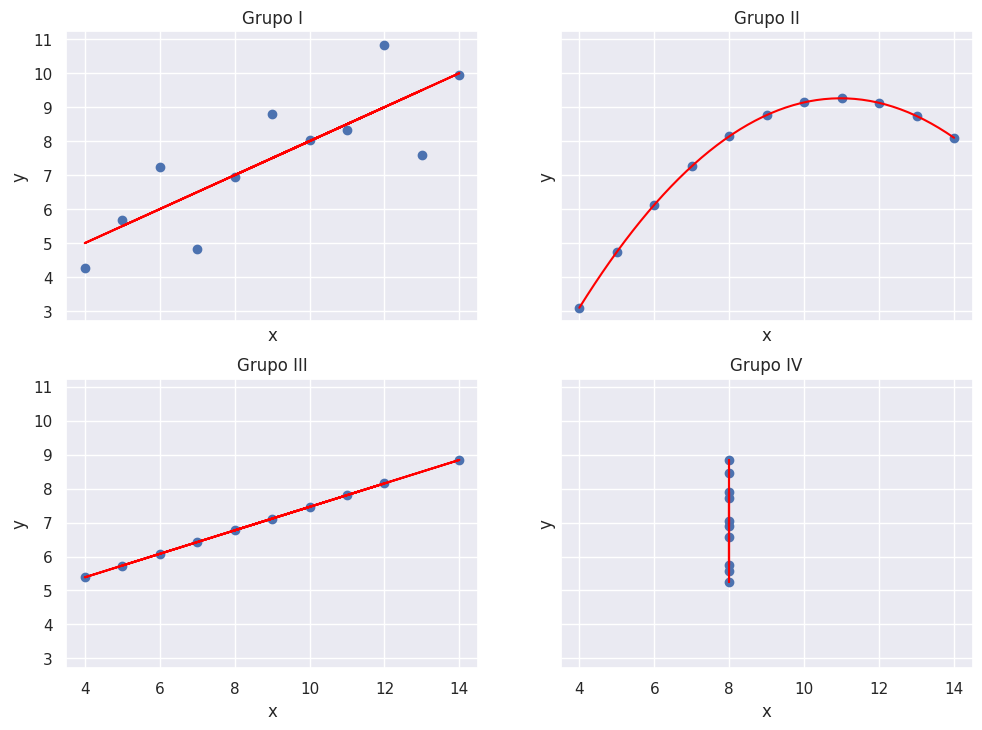

In [59]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)#para el grafico

#Grupo 1
x=data[data['dataset']=='I']['x']
ytrue=data[data['dataset']=='I']['y']
x=x.array.reshape(-1,1)
ytrue=ytrue.array.reshape(-1,1)
model.fit(x,ytrue)
ypred=model.predict(x)
axs[0,0].scatter(x,ytrue)
axs[0,0].plot(x,ypred,color='red')
axs[0,0].set_title('Grupo I')

#Grupo 2
x=data[data['dataset']=='II']['x']
ytrue=data[data['dataset']=='II']['y']
weights=np.polyfit(x,ytrue,2)
x_continum = np.linspace(4,14)
ypredict=weights[0]*x_continum*x_continum+weights[1]*x_continum+weights[2]*np.ones(len(x_continum))
axs[0,1].scatter(x,ytrue)
axs[0,1].plot(x_continum,ypredict,color='red')
axs[0,1].set_title('Grupo II')

#Grupo 3
x=data[data['dataset']=='III']['x']
x=x.drop(24)
ytrue=data[data['dataset']=='III']['y']
ytrue=ytrue.drop(24)
x=x.array.reshape(-1,1)
ytrue=ytrue.array.reshape(-1,1)
model.fit(x,ytrue)
ypred=model.predict(x)
axs[1,0].scatter(x,ytrue)
axs[1,0].plot(x,ypred,color='red')
axs[1,0].set_title('Grupo III')

#Grupo 4
x=data[data['dataset']=='IV']['x']
x=x.drop(40)
ytrue=data[data['dataset']=='IV']['y']
ytrue=ytrue.drop(40)
x=x.array.reshape(-1,1)
ytrue=ytrue.array.reshape(-1,1)
model.fit(ytrue,x)
xpred=model.predict(ytrue)
axs[1,1].scatter(x,ytrue)
axs[1,1].plot(xpred,ytrue,color='red')
axs[1,1].set_title('Grupo IV')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
plt.plot()